# **How to plot the map of India using Python**

> In this notebook, we will learn an easy way to plot state wise map of India. The python libraries required are :
1. pandas 
2. matplotlib
3. geopandas 

> We know that pandas and matplotlib are commmonly used python libraries for data analysis and plotting graphs. Now lets see what is *geopandas*? 

> **GeoPandas** is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by **'pandas'** to allow spatial operations on geometric types. Geometric operations are performed by **'shapely'**. Geopandas further depends on 'fiona' for file access and **'descartes'** and **'matplotlib'** for plotting. More details can be found [here](https://geopandas.org/)

> How to install geopandas : 
> pip install geopandas

> Don't forget to install all other dependencies required for geopandas!

> Now that we are all set one more thing that we require is a *shape file*. 
> > A **shapefile** is a simple, nontopological format for storing the geometric location and attribute information of geographic features. Geographic features in a shapefile can be represented by points, lines, or polygons (areas)

> > You can download the shape file to plot the map of India with state boundaries from [this link](https://map.igismap.com/share-map/export-layer/Indian_States/06409663226af2f3114485aa4e0a23b4)

> We are going to plot on the map - the number of **Paramedical Staffs** available at various district hospitals in India as of 31st March 2019. The data was collected from Open Goverment Data, India. Follow [this link](https://data.gov.in/) to know more.

# **1) Importing libraries**

In [2]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 

# **2) Reading data file**

In [28]:
dataset=pd.read_excel('/kaggle/input/hojabhai/hojabhai.xlsx')
dataset.head()

,State,Count
0,Andaman & Nicobar Island,0
1,Arunanchal Pradesh,0
2,Assam,7
3,Bihar,9
4,Chandigarh,1


# **3) Reading shape file**

In [29]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
shp_gdf.head(45)
geo=shp_gdf['geometry']

In [6]:
geo

0     MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1     POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4     POLYGON ((76.84147 30.75996, 76.83599 30.73623...
5     POLYGON ((83.33532 24.09885, 83.35346 24.09627...
6     POLYGON ((73.20657 20.12216, 73.20797 20.10650...
7     MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...
8     MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...
9     MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...
10    POLYGON ((76.85065 30.87512, 76.86594 30.86691...
11    POLYGON ((76.79634 33.25490, 76.80351 33.25275...
12    POLYGON ((74.73451 37.02068, 74.73647 37.01937...
13    POLYGON ((87.60582 25.31512, 87.61279 25.31184...
14    MULTIPOLYGON (((74.69694 13.32782, 74.69562 13...
15    POLYGON ((74.99575 12.79227, 75.00006 12.78777...
16    MULTIPOLYGON (((74.10131 11.20431, 74.09908 11...
17    MULTIPOLYGON (((74.17932 22.39059, 74.1777

In [14]:
dataset['geometry']

0     MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1     POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4     POLYGON ((76.84147 30.75996, 76.83599 30.73623...
5     POLYGON ((83.33532 24.09885, 83.35346 24.09627...
6     POLYGON ((73.20657 20.12216, 73.20797 20.10650...
7     MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...
8     MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...
9     MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...
10    POLYGON ((76.85065 30.87512, 76.86594 30.86691...
11    POLYGON ((76.79634 33.25490, 76.80351 33.25275...
12    POLYGON ((74.73451 37.02068, 74.73647 37.01937...
13    POLYGON ((87.60582 25.31512, 87.61279 25.31184...
14    MULTIPOLYGON (((74.69694 13.32782, 74.69562 13...
15    POLYGON ((74.99575 12.79227, 75.00006 12.78777...
16    MULTIPOLYGON (((74.10131 11.20431, 74.09908 11...
17    MULTIPOLYGON (((74.17932 22.39059, 74.1777

In [15]:
dataset
from geopandas import GeoDataFrame
gdf = GeoDataFrame(dataset)

In [ ]:
dataset.drop('geom')

In [30]:
merged = shp_gdf.set_index('st_nm').join(dataset.set_index('State'))


# **4) Merging data file and shape file based on names of Indian states**

In [48]:
merged['Count ']

st_nm
Andaman & Nicobar Island      0
Arunanchal Pradesh            0
Assam                         7
Bihar                         9
Chandigarh                    1
Chhattisgarh                  8
Dadara & Nagar Havelli        1
Daman & Diu                   0
Goa                           3
Gujarat                      97
Haryana                      39
Himachal Pradesh              1
Jammu & Kashmir               4
Jharkhand                     0
Karnataka                    60
Kerala                       28
Lakshadweep                   0
Madhya Pradesh               30
Maharashtra                 134
Manipur                       1
Meghalaya                     0
Mizoram                       3
Nagaland                      0
NCT of Delhi                 46
Puducherry                    3
Punjab                       42
Rajasthan                    16
Sikkim                        0
Tamil Nadu                  124
Telangana                    13
Tripura                       0
Ut

# **5) Plotting map of India**

> Now we are going to plot a *choropleth map* to represent the number of paramedical staff in India.

> A **choropleth map** is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income.

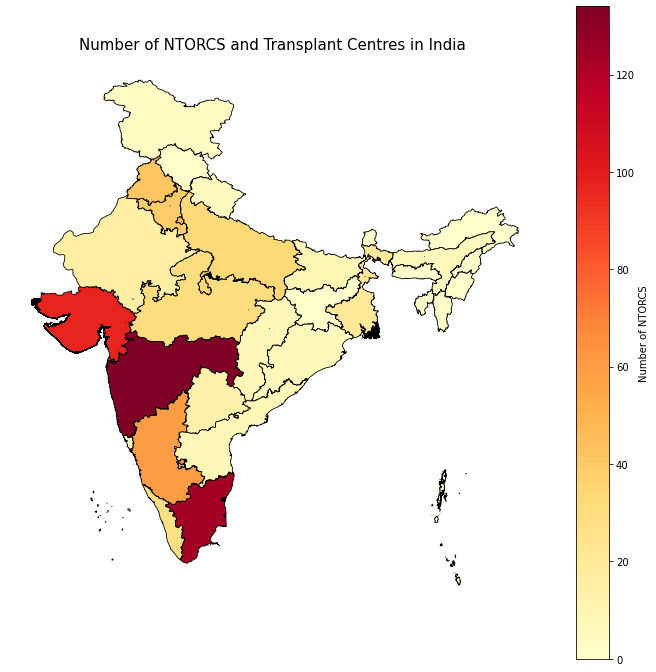

In [50]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Number of NTORCS and Transplant Centres in India ',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
merged.plot(column='Count ',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of NTORCS"})

> Here we can see that the states in **red** have less number of staff and those in **green** have more number.